<a href="https://colab.research.google.com/github/unmatched78/mentrual_cycle_predictor/blob/main/EDA_%2B_Menstrual_Cycle_Length_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
nikitabisht_menstrual_cycle_data_path = kagglehub.dataset_download('nikitabisht/menstrual-cycle-data')

print('Data source import complete.')


100%|██████████| 37.6k/37.6k [00:00<00:00, 34.8MB/s]

Extracting files...
Data source import complete.


# **Importing Basic Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
df= pd.read_csv("FedCycleData071012 (2).csv")
df.head(10)

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,9,,,2,7,7,1,1,0,21.254724111867
1,nfp8122,2,0,1,0,27,,15,12,13,...,,,,,,,,,,
2,nfp8122,3,0,1,0,29,,15,14,,...,,,,,,,,,,
3,nfp8122,4,0,1,0,27,,15,12,13,...,,,,,,,,,,
4,nfp8122,5,0,1,0,28,,16,12,12,...,,,,,,,,,,
5,nfp8122,6,0,1,0,26,,15,11,10,...,,,,,,,,,,
6,nfp8122,7,0,1,0,29,,16,13,,...,,,,,,,,,,
7,nfp8122,8,0,1,2,24,,14,10,9,...,,,,,,,,,,
8,nfp8122,9,0,1,0,28,,16,12,9,...,,,,,,,,,,
9,nfp8122,10,0,1,0,28,,17,11,13,...,,,,,,,,,,


# EDA And Data Cleaning

In [6]:
df.shape

(1665, 80)

In [7]:
for cols in df.columns:
    print(f"{cols} : \n {df[cols].unique()} \n \n")

ClientID : 
 ['nfp8122' 'nfp8114' 'nfp8109' 'nfp8107' 'nfp8106' 'nfp8024' 'nfp8020'
 'nfp8026' 'nfp8030' 'nfp8031' 'nfp8032' 'nfp8034' 'nfp8036' 'nfp8040'
 'nfp8041' 'nfp8042' 'nfp8043' 'nfp8045' 'nfp8046' 'nfp8047' 'nfp8049'
 'nfp8050' 'nfp8051' 'nfp8057' 'nfp8058' 'nfp8060' 'nfp8062' 'nfp8063'
 'nfp8064' 'nfp8066' 'nfp8068' 'nfp8069' 'nfp8072' 'nfp8073' 'nfp8074'
 'nfp8076' 'nfp8079' 'nfp8080' 'nfp8083' 'nfp8085' 'nfp8087' 'nfp8091'
 'nfp8094' 'nfp8099' 'nfp8100' 'nfp8101' 'nfp8102' 'nfp8110' 'nfp8113'
 'nfp8116' 'nfp8123' 'nfp8124' 'nfp8129' 'nfp8131' 'nfp8133' 'nfp8137'
 'nfp8140' 'nfp8143' 'nfp8144' 'nfp8149' 'nfp8150' 'nfp8152' 'nfp8154'
 'nfp8155' 'nfp8159' 'nfp8161' 'nfp8164' 'nfp8165' 'nfp8168' 'nfp8172'
 'nfp8173' 'nfp8174' 'nfp8176' 'nfp8177' 'nfp8178' 'nfp8179' 'nfp8184'
 'nfp8186' 'nfp8187' 'nfp8188' 'nfp8189' 'nfp8190' 'nfp8192' 'nfp8193'
 'nfp8195' 'nfp8196' 'nfp8197' 'nfp8200' 'nfp8206' 'nfp8207' 'nfp8209'
 'nfp8210' 'nfp8211' 'nfp8212' 'nfp8218' 'nfp8221' 'nfp8223' 'nf

**There are missing values in almost all columns as whitespace " " So let's replace them with nan**

In [8]:
df =df.replace(' ', np.nan)

In [9]:
df.isnull().sum()

,0
ClientID,0
CycleNumber,0
Group,0
CycleWithPeakorNot,0
ReproductiveCategory,0
...,...
NextpregM,1524
Spousesame,1523
SpousesameM,1523
Timeattemptpreg,1523


In [10]:
cols_with_missing_cols= []
cols_without_missing_values = []
for cols in df.columns:
    if df[cols].isnull().sum() == 0:
        cols_without_missing_values.append(cols)

    else:
        cols_with_missing_cols.append(cols)

print(f'Number of Columns without any missing values:  {len(cols_without_missing_values)}\n')
print(f'Number of Columns with missing values :  {len(cols_with_missing_cols)}')

Number of Columns without any missing values:  6

Number of Columns with missing values :  74


**There are 74 columns with missing values now let's handle them**

In [11]:
null = df.isnull().sum().sort_values(ascending=False)
null_per = ((df.isnull().sum()) / (df.shape[0])).sort_values(ascending=False)*100.
null_values = pd.DataFrame({
    "Column Name": null.index,
    "Total Number of Missing Values": null.values,
    "Missing Values in Percentage": null_per.values
})


<ipython-input-12-1436f7167f3c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"] >= 50], x="Missing Values in Percentage", y="Column Name", palette="viridis")


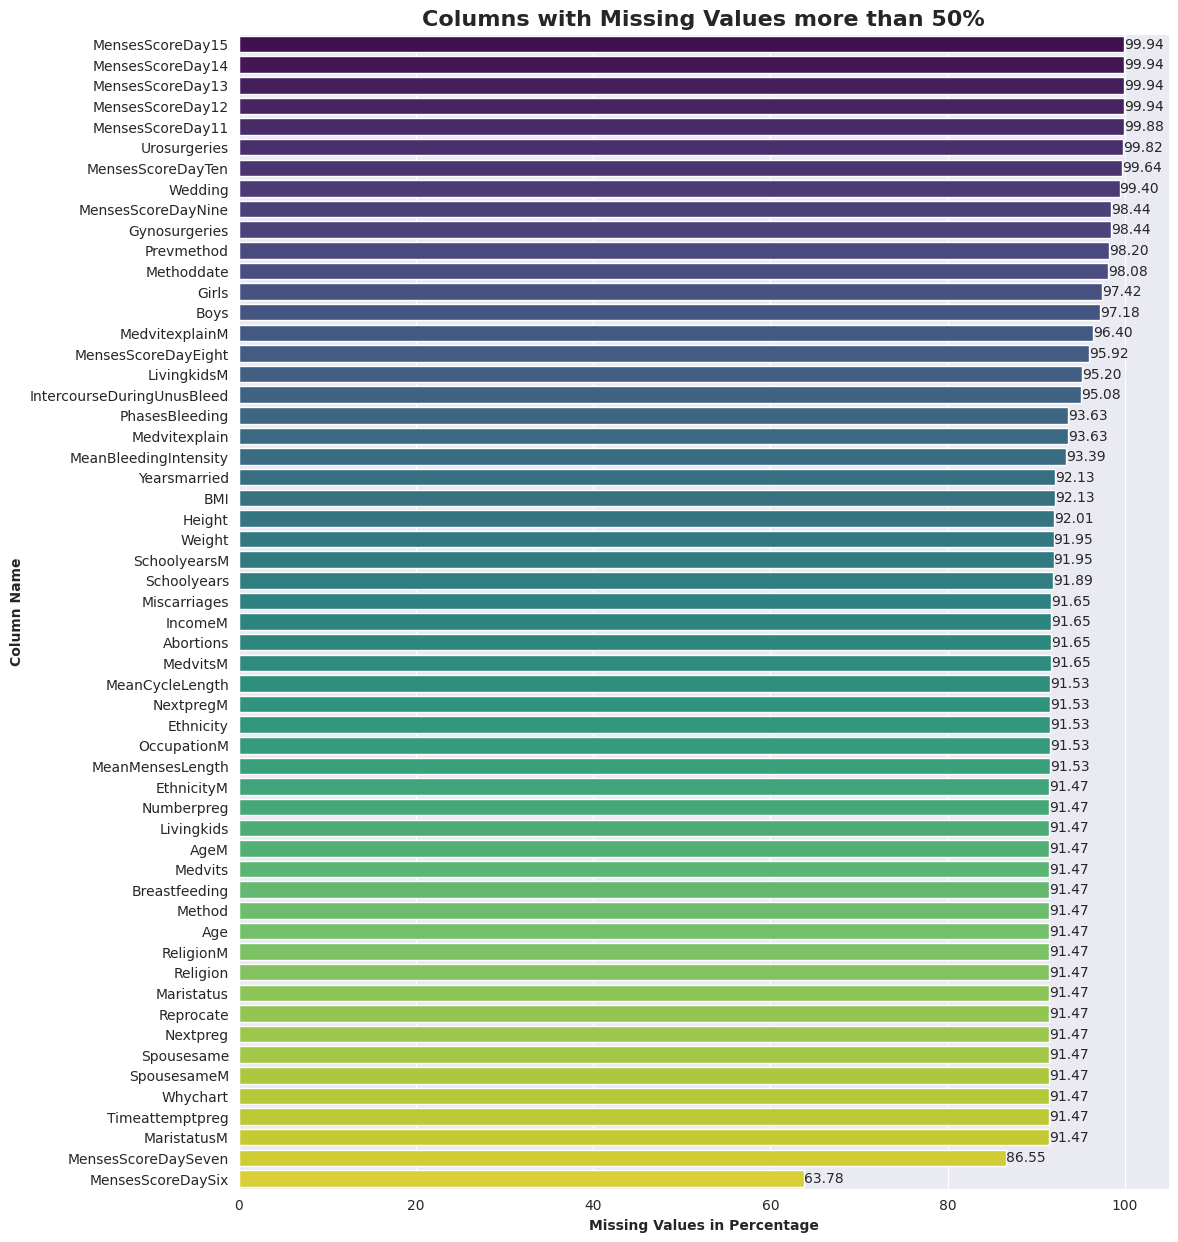

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 15))

ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"] >= 50], x="Missing Values in Percentage", y="Column Name", palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Columns with Missing Values more than 50%',fontsize=16, fontweight='bold')
plt.xlabel('Missing Values in Percentage',fontweight='bold')
plt.ylabel('Column Name',fontweight='bold')
plt.show()

<ipython-input-13-0f25525a702c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"]< 50], x="Missing Values in Percentage", y="Column Name", palette="viridis")


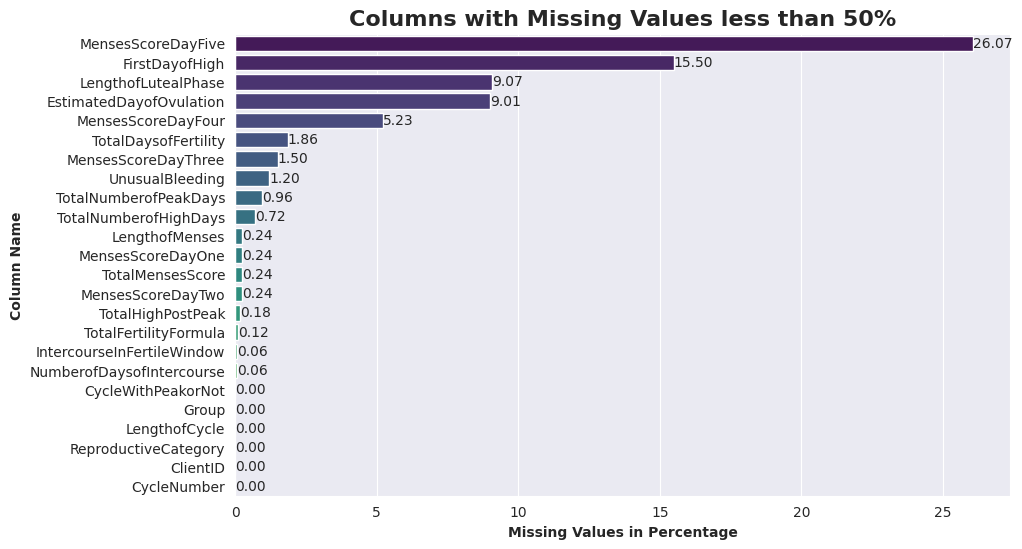

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))

ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"]< 50], x="Missing Values in Percentage", y="Column Name", palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Columns with Missing Values less than 50%', fontsize=16, fontweight='bold')
plt.xlabel('Missing Values in Percentage', fontweight='bold')
plt.ylabel('Column Name',fontweight='bold')
plt.show()

**Removing Columns that have more than 50% of missing values**

In [14]:
remove_cols = null_values[null_values["Missing Values in Percentage"] >= 50]["Column Name"].tolist()
df = df.drop(columns=remove_cols)


**Removing "ClientID" since it will not contribute in predicting Cycle Length**

In [15]:
df = df.drop(columns="ClientID")

In [16]:
df.shape

(1665, 23)

In [17]:
df.dtypes

,0
CycleNumber,int64
Group,int64
CycleWithPeakorNot,int64
ReproductiveCategory,int64
LengthofCycle,int64
EstimatedDayofOvulation,object
LengthofLutealPhase,object
FirstDayofHigh,object
TotalNumberofHighDays,object
TotalHighPostPeak,object


In [18]:
categorical_columns = df.select_dtypes(include= object).columns
categorical_columns

Index(['EstimatedDayofOvulation', 'LengthofLutealPhase', 'FirstDayofHigh',
       'TotalNumberofHighDays', 'TotalHighPostPeak', 'TotalNumberofPeakDays',
       'TotalDaysofFertility', 'TotalFertilityFormula', 'LengthofMenses',
       'MensesScoreDayOne', 'MensesScoreDayTwo', 'MensesScoreDayThree',
       'MensesScoreDayFour', 'MensesScoreDayFive', 'TotalMensesScore',
       'NumberofDaysofIntercourse', 'IntercourseInFertileWindow',
       'UnusualBleeding'],
      dtype='object')

**Checking distribution Of Data**

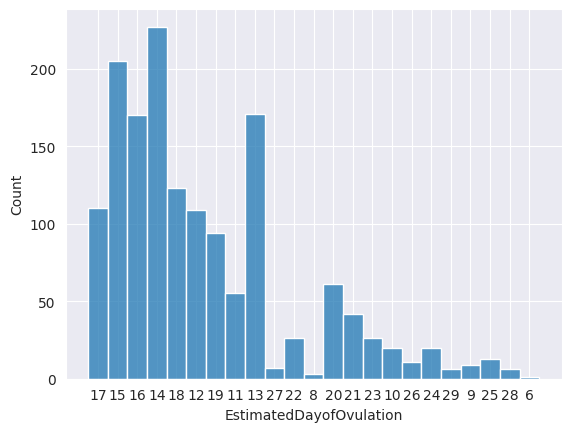

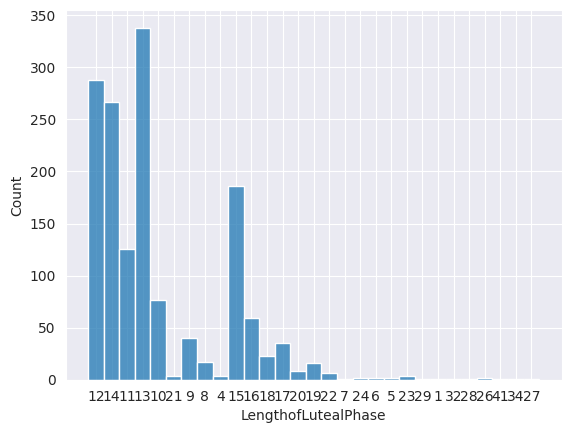

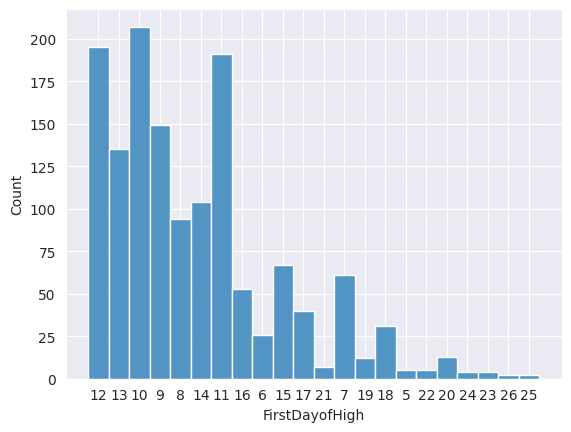

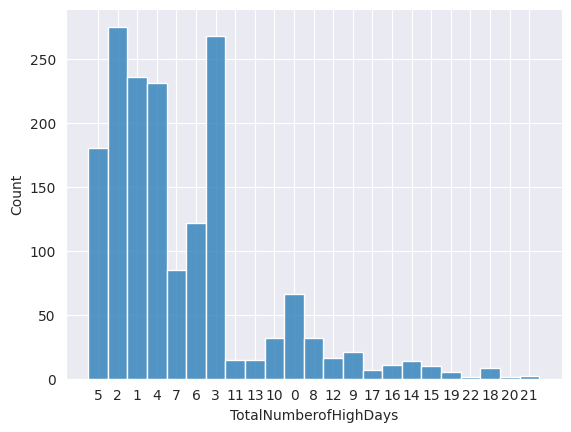

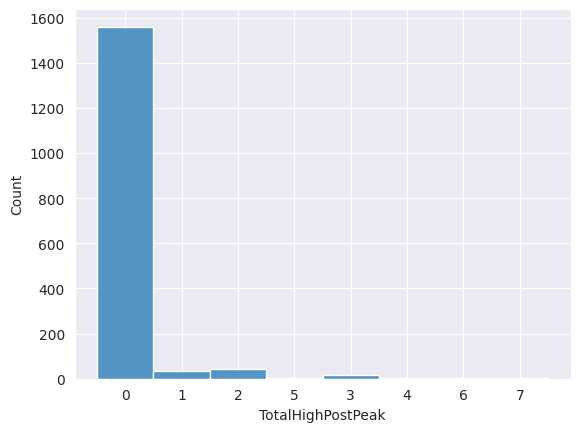

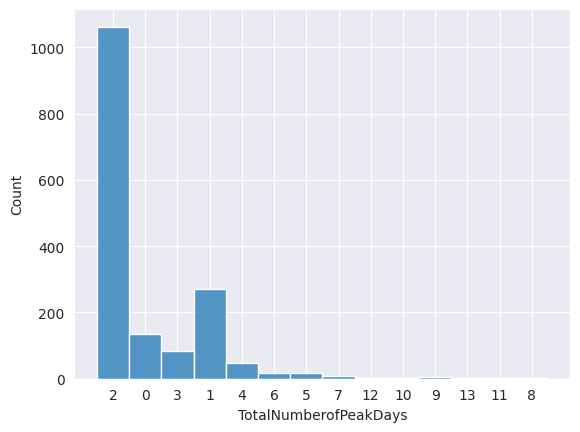

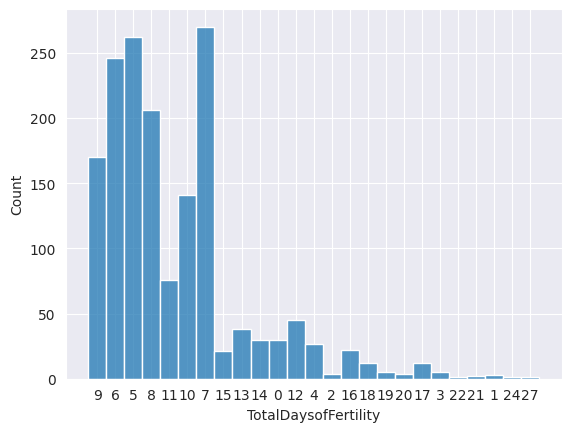

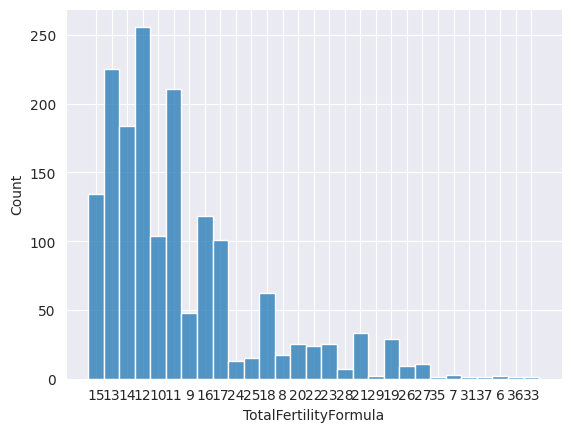

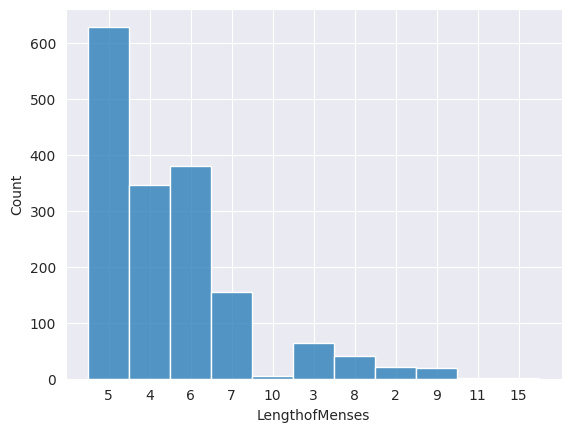

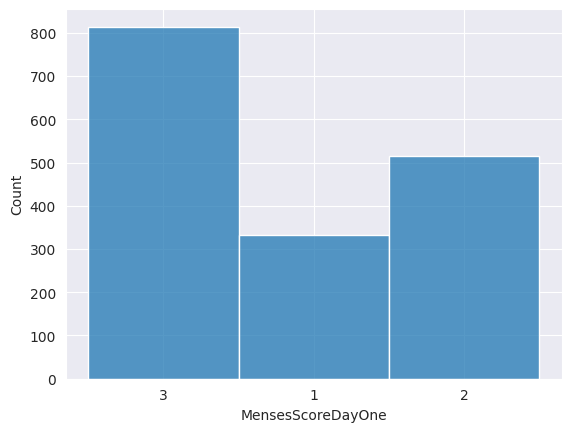

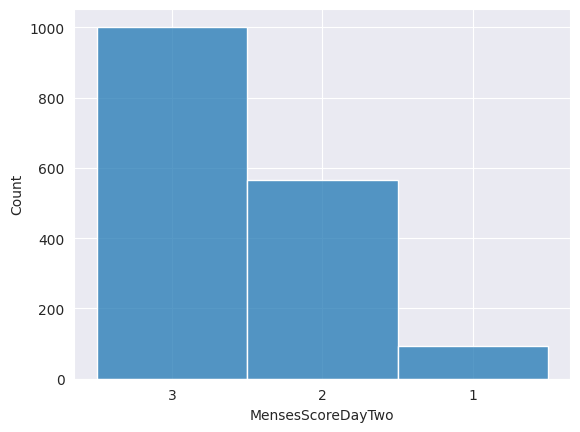

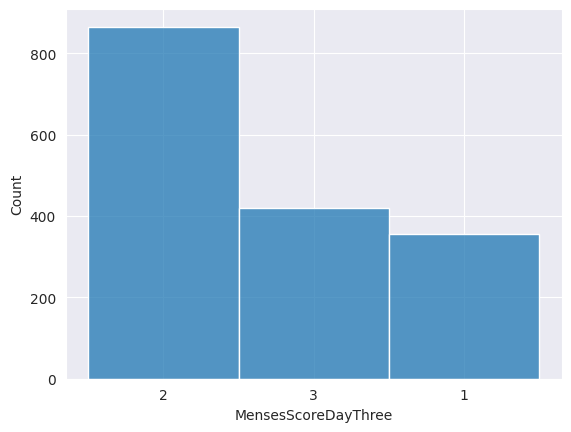

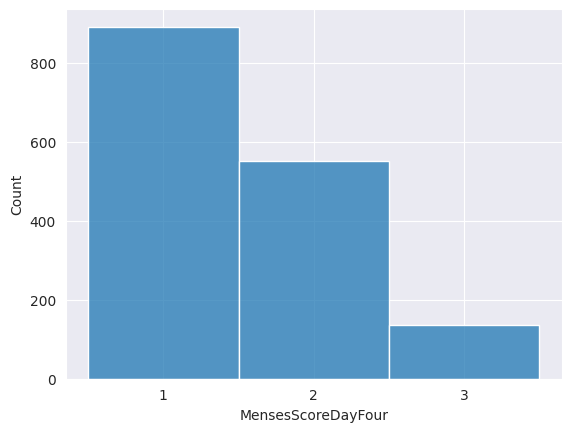

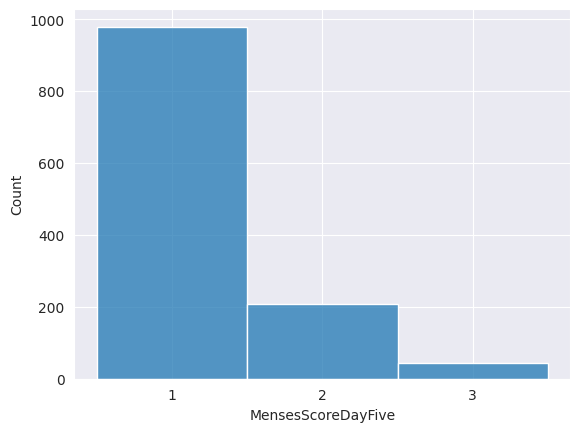

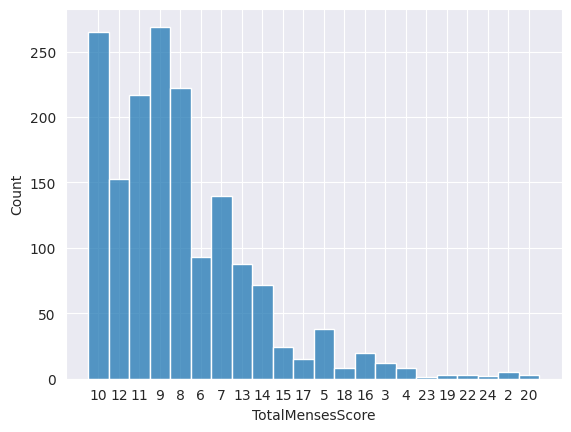

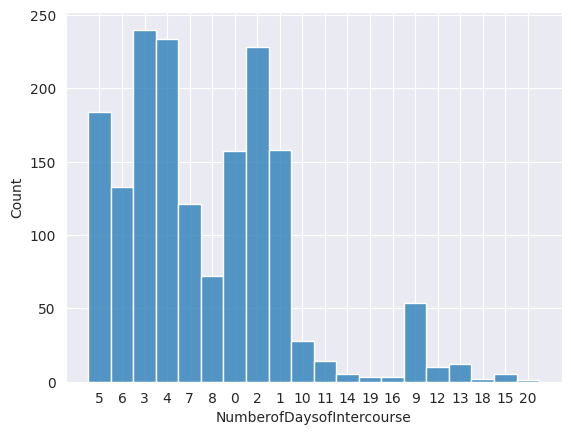

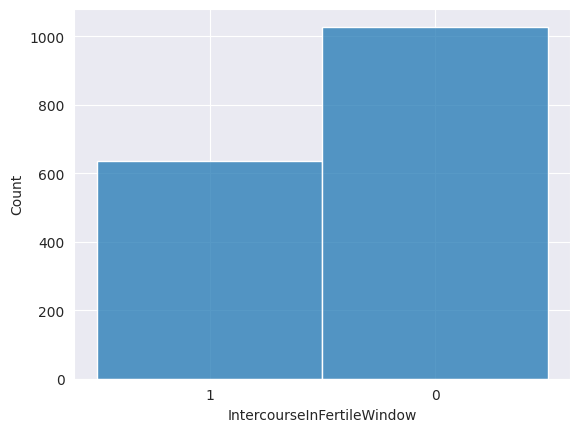

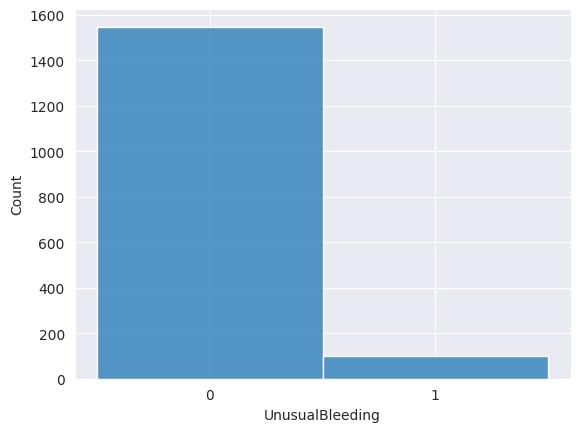

In [19]:
for i in categorical_columns:
    sns.histplot(data=df[i])
    plt.show()

In [20]:
encoder = LabelEncoder()

for cols in categorical_columns:
        df[cols] = pd.to_numeric(df[cols])
        df[cols] = encoder.fit_transform(df[cols])

In [21]:
for i in df.columns:
    if ( df[i].isnull().sum() ) > 100:
        df[i]= df[i].fillna(df[i].mean())

**Updated Dataset**

In [22]:
df

,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalHighPostPeak,...,LengthofMenses,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,TotalMensesScore,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding
0,1,0,1,0,29,10,9,7,5,0,...,3,2,2,1,0,0,8,5,1,0
1,2,0,1,0,27,8,9,8,2,0,...,3,2,2,1,0,0,8,6,1,0
2,3,0,1,0,29,8,11,22,1,0,...,3,2,2,1,0,0,8,5,1,0
3,4,0,1,0,27,8,9,8,2,0,...,3,2,2,2,1,0,10,3,0,0
4,5,0,1,0,28,9,9,7,4,0,...,3,2,2,1,1,0,9,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,7,1,1,0,29,12,7,8,5,0,...,6,1,2,2,1,1,13,8,0,1
1661,8,1,1,0,28,10,8,7,3,0,...,4,2,2,1,0,0,9,11,1,0
1662,9,1,1,0,28,9,9,6,4,0,...,3,2,1,1,0,0,7,7,0,0
1663,10,1,1,1,40,20,10,8,13,0,...,4,1,2,2,1,0,10,3,0,0


In [23]:
df.isnull().sum()

,0
CycleNumber,0
Group,0
CycleWithPeakorNot,0
ReproductiveCategory,0
LengthofCycle,0
EstimatedDayofOvulation,0
LengthofLutealPhase,0
FirstDayofHigh,0
TotalNumberofHighDays,0
TotalHighPostPeak,0


In [24]:
df.drop_duplicates()

,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalHighPostPeak,...,LengthofMenses,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,TotalMensesScore,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding
0,1,0,1,0,29,10,9,7,5,0,...,3,2,2,1,0,0,8,5,1,0
1,2,0,1,0,27,8,9,8,2,0,...,3,2,2,1,0,0,8,6,1,0
2,3,0,1,0,29,8,11,22,1,0,...,3,2,2,1,0,0,8,5,1,0
3,4,0,1,0,27,8,9,8,2,0,...,3,2,2,2,1,0,10,3,0,0
4,5,0,1,0,28,9,9,7,4,0,...,3,2,2,1,1,0,9,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,7,1,1,0,29,12,7,8,5,0,...,6,1,2,2,1,1,13,8,0,1
1661,8,1,1,0,28,10,8,7,3,0,...,4,2,2,1,0,0,9,11,1,0
1662,9,1,1,0,28,9,9,6,4,0,...,3,2,1,1,0,0,7,7,0,0
1663,10,1,1,1,40,20,10,8,13,0,...,4,1,2,2,1,0,10,3,0,0


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CycleNumber,1665.0,8.040841,6.593686,1.0,3.0,7.0,11.0,45.0
Group,1665.0,0.382583,0.486164,0.0,0.0,0.0,1.0,1.0
CycleWithPeakorNot,1665.0,0.912312,0.282925,0.0,1.0,1.0,1.0,1.0
ReproductiveCategory,1665.0,0.055255,0.479706,0.0,0.0,0.0,0.0,9.0
LengthofCycle,1665.0,29.299099,3.887932,18.0,27.0,29.0,31.0,54.0
EstimatedDayofOvulation,1665.0,10.228228,5.254078,0.0,7.0,9.0,12.0,23.0
LengthofLutealPhase,1665.0,11.957357,5.911200,0.0,9.0,10.0,12.0,29.0
FirstDayofHigh,1665.0,9.123123,6.274460,0.0,5.0,7.0,11.0,22.0
TotalNumberofHighDays,1665.0,4.383183,3.833958,0.0,2.0,3.0,5.0,23.0
TotalHighPostPeak,1665.0,0.147748,0.697546,0.0,0.0,0.0,0.0,8.0


# **Handling Outliers**

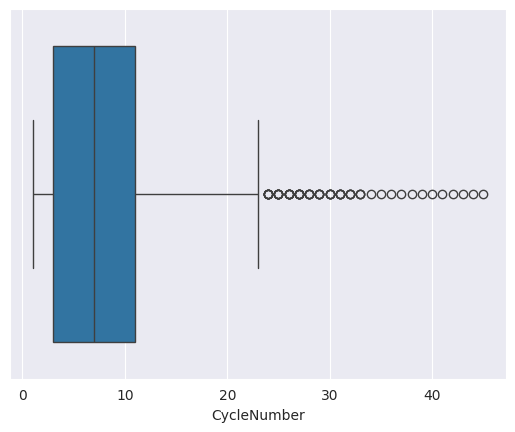

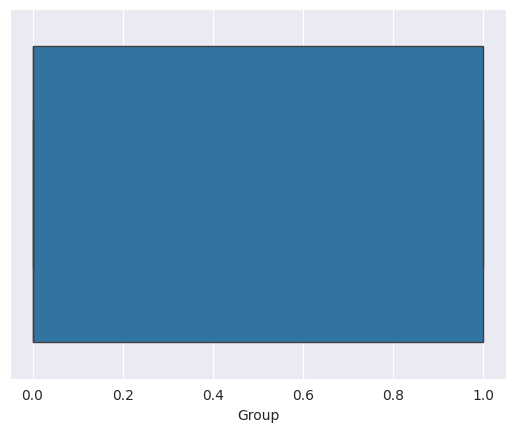

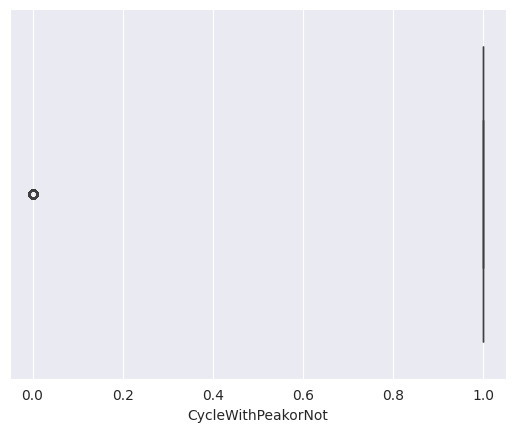

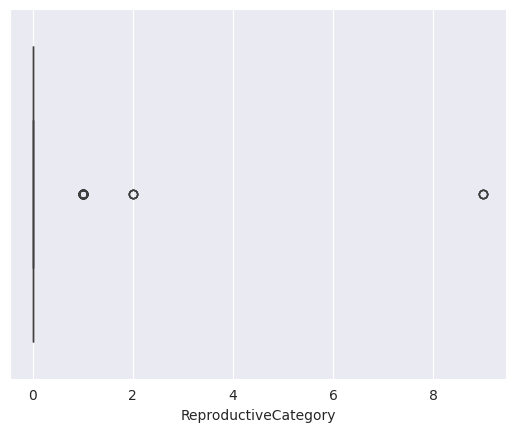

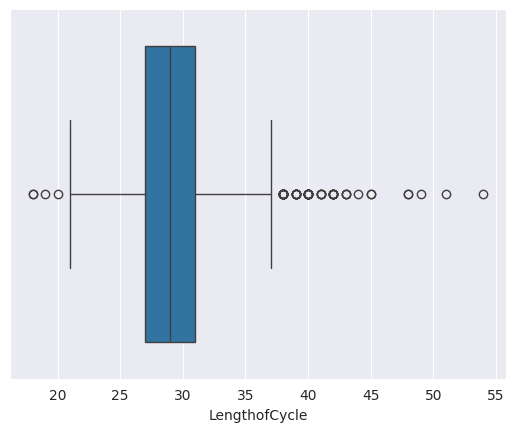

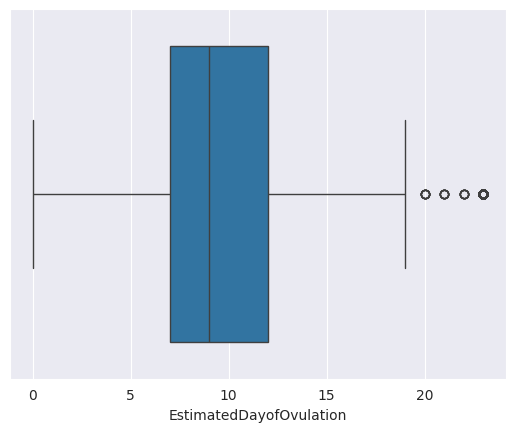

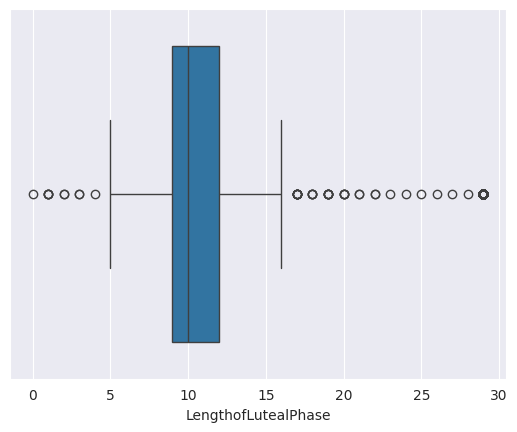

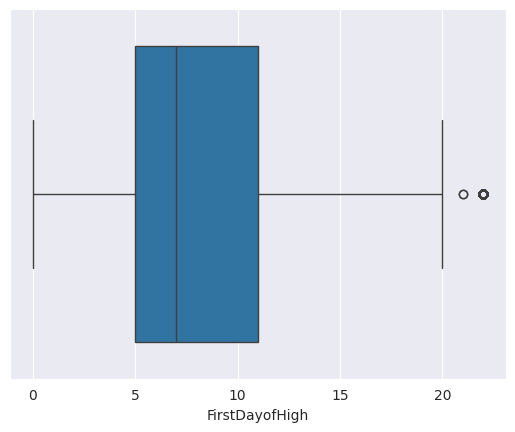

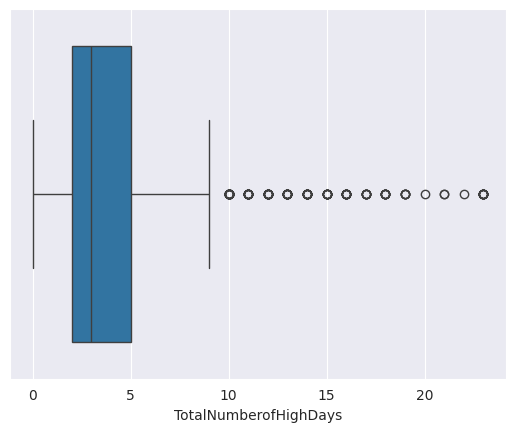

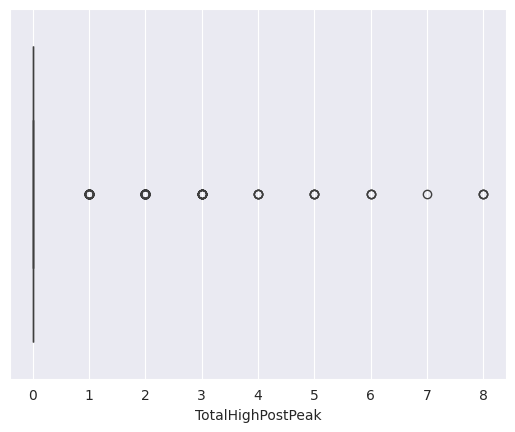

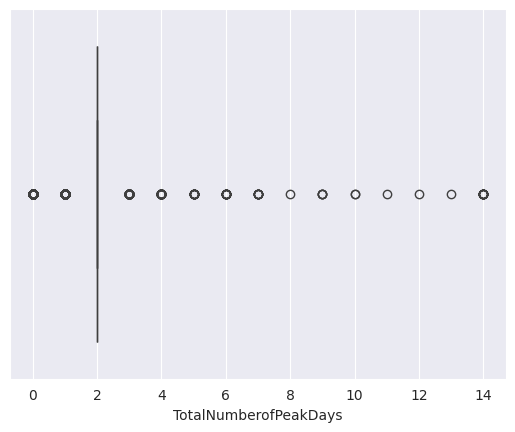

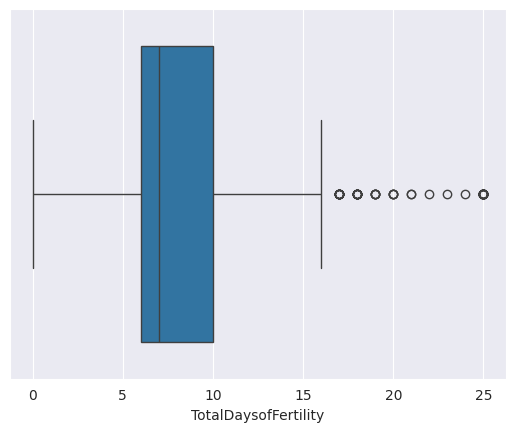

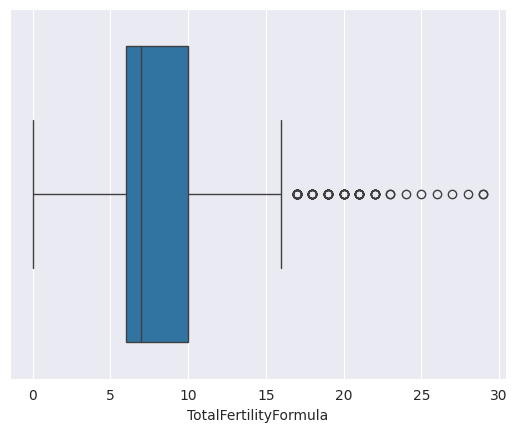

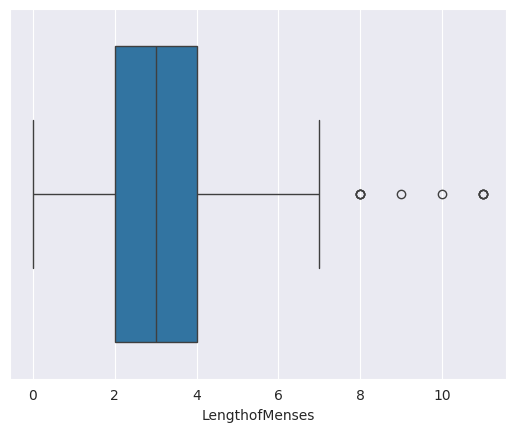

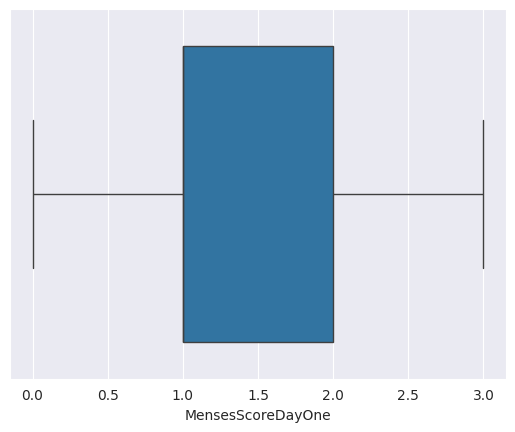

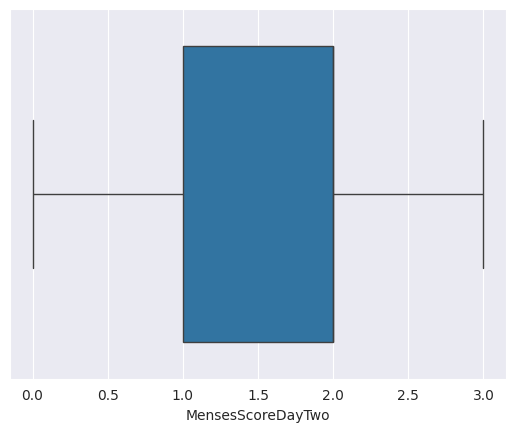

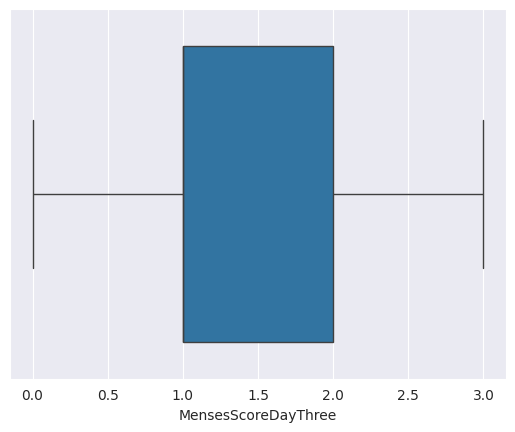

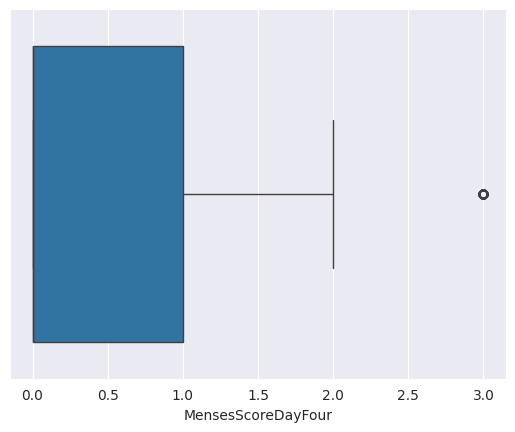

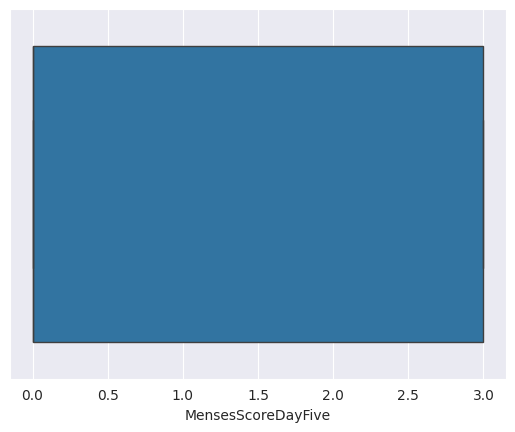

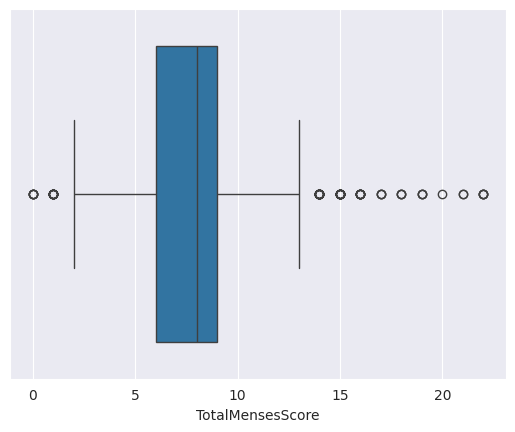

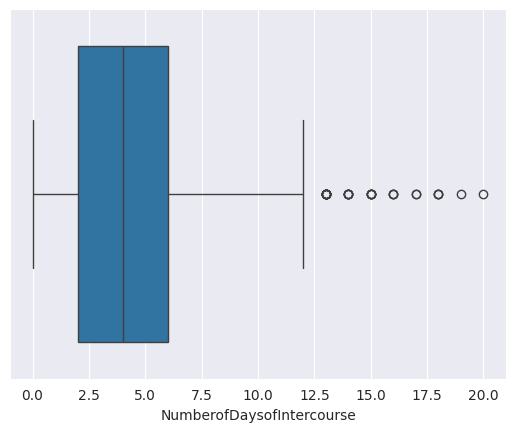

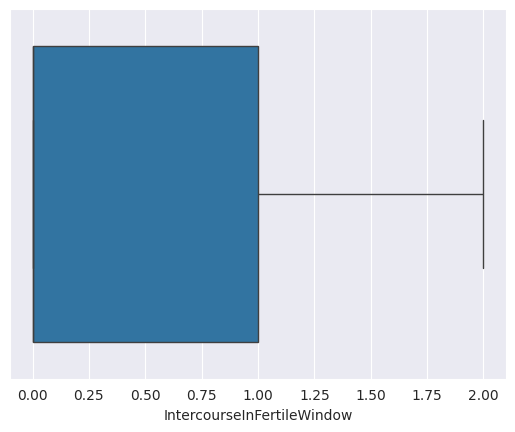

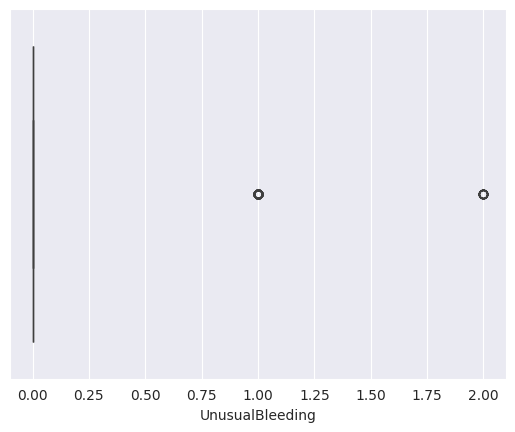

In [26]:
for cols in df.columns:
    sns.boxplot(data=df[cols] ,orient= "h")
    plt.show()

In [27]:
outliers_percentages = []

for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outliers_percentage = (outliers_count / len(df[col])) * 100

    outliers_percentages.append({'Column': col, 'Outlier Percentage': outliers_percentage})

outliers_df = pd.DataFrame(outliers_percentages)
outliers_df = outliers_df.sort_values(by='Outlier Percentage', ascending=False)


<ipython-input-28-73662139011c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data= outliers_df , x="Outlier Percentage", y= "Column" , palette="viridis")


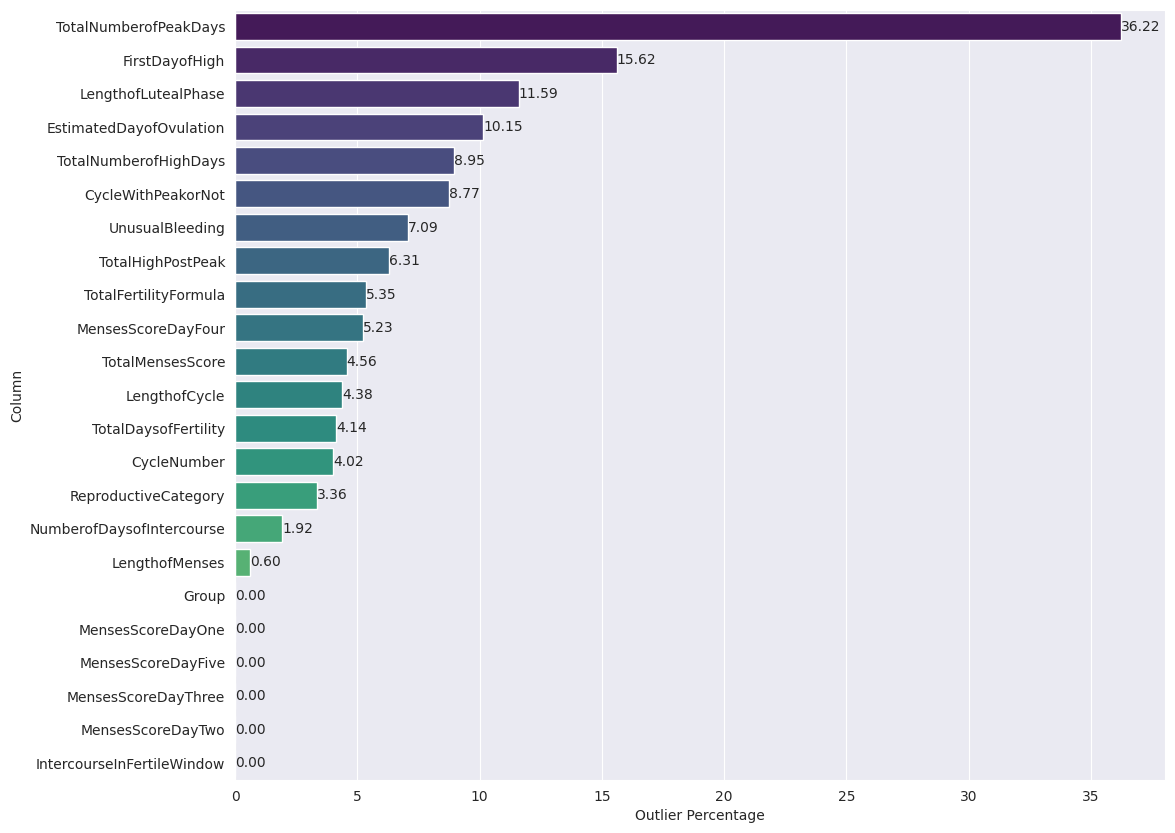

In [28]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,10))
ax = sns.barplot(data= outliers_df , x="Outlier Percentage", y= "Column" , palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()

In [29]:
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Calculate outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_percentage = outliers.mean() * 100


    df[col] = df[col].where(~outliers, np.mean(df[col]))


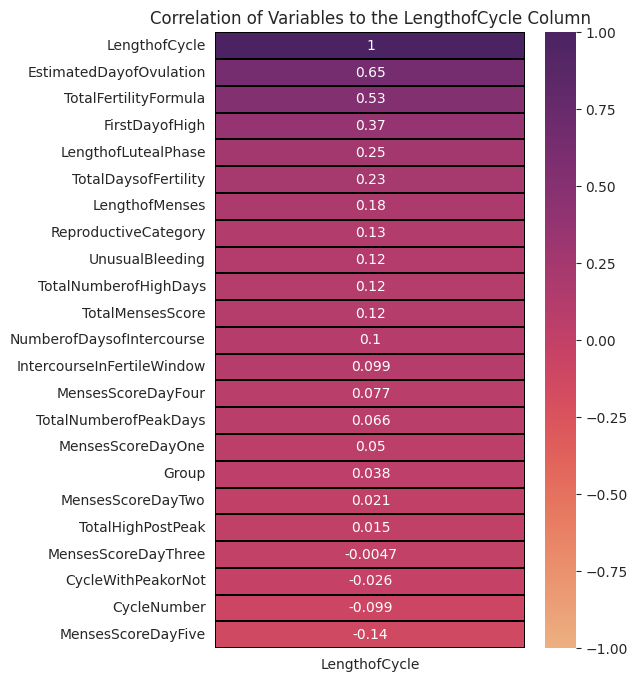

In [30]:
plt.figure(figsize=(5,8))
sns.heatmap(df.corr()['LengthofCycle'].sort_values(ascending=False).to_frame(),
            annot=True, vmin=-1, vmax=1, linewidths=0.3, linecolor='black', cmap= 'flare')
plt.title('Correlation of Variables to the LengthofCycle Column')
plt.show()

Since variables in our dataset do not have a strong correlation with the target variable, traditional linear models like linear regression might not perform well.

In [31]:
y = df["LengthofCycle"]
x = df.drop('LengthofCycle', axis=1)

In [32]:
scaler =StandardScaler()
x= scaler.fit_transform(x)

In [33]:
x_train, x_test ,y_train, y_test = train_test_split(x,y,train_size=0.8, random_state= 42)

# **Random Forest Regressor**

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [35]:
random_forest = RandomForestRegressor(n_estimators= 49, criterion="squared_error", max_depth= 67)

In [36]:
random_forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=67, n_estimators=49)

In [37]:
y_pred = random_forest.predict(x_test)

In [38]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

1.2049971190695692


# **XGB**

In [39]:
import xgboost as xgb

In [40]:
simple_reg= xgb.XGBRegressor(objective="reg:squarederror", seeds= 123)
simple_reg.fit(x_train,y_train)

y_pred = simple_reg.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

1.1494206022146898


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:53:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "seeds" } are not used.

  warnings.warn(smsg, UserWarning)


# **Hyperparameter Tuning**

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param={
    "eta" : [0.1, 0.2, 0.3],
    "max_depth" : [10, 50, 100],
    "subsample" : [0.8, 0.9, 1.0],
    "colsample_bytree" : [0.8, 0.9, 1.0],
    'gamma' : [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1]
}

In [43]:
xg_reg =xgb.XGBRegressor(objective="reg:squarederror")

grid_search = GridSearchCV(estimator=xg_reg, param_grid=param, verbose= 1, cv= 2, scoring="neg_mean_squared_error", n_jobs= -1)
grid_search.fit(x_train,y_train)

best_params = grid_search.best_params_

print(f"best parameters: {best_params}")
print(f"best rmse from cv: {grid_search.best_score_} \n")

Fitting 2 folds for each of 5184 candidates, totalling 10368 fits
best parameters: {'colsample_bytree': 0.8, 'eta': 0.3, 'gamma': 0.3, 'max_depth': 10, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.9}
best rmse from cv: -2.324618428111206 



In [44]:
best_xgb_reg = grid_search.best_estimator_
y_pred = best_xgb_reg.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Rmse with test data: {rmse}")

Rmse with test data: 1.3014752257403241


In [45]:
import joblib

In [46]:
joblib.dump(best_xgb_reg, 'tuned_xgb_model.pkl')


['tuned_xgb_model.pkl']

In [47]:
plt.savefig('plot_name.png')


<Figure size 640x480 with 0 Axes>

In [48]:
import joblib
joblib.dump(random_forest, 'random_forest_model.pkl')
joblib.dump(best_xgb_reg, 'best_xgb_model.pkl')


['best_xgb_model.pkl']